In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv("../Data/Housing.csv")
print(df.head())
print("\nDataset shape:", df.shape)

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset shape: (545, 13)


In [2]:
# Data preprocessing
# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select features and target
feature_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 
                'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
target_col = 'price'

X = df[feature_cols].values
y = df[target_col].values

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

Feature matrix shape: (545, 12)
Target vector shape: (545,)


In [3]:
# Scale features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

n_samples, n_features = X_scaled.shape
X_bias = np.c_[np.ones((n_samples, 1)), X_scaled]

print("Scaled feature matrix shape:", X_scaled.shape)
print("Scaled target vector shape:", y_scaled.shape)

Scaled feature matrix shape: (545, 12)
Scaled target vector shape: (545,)


In [4]:
# Set hyperparameters
epochs = 100
learning_rate = 0.01

## Batch Gradient Descent

In [5]:
def batch_gradient_descent(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    for epoch in range(epochs):
        predictions = x @ weights
        error = predictions - y
        gradient = (2 / len(y)) * x.T @ error
        weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            mse = np.mean(error ** 2)
            print(f"[Batch] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

## Stochastic Gradient Descent

In [6]:
def stochastic_gradient_descent(x, y, lr, epochs):
    weights = np.zeros(x.shape[1])
    for epoch in range(epochs):
        for i in range(len(y)):
            xi = x[i]
            yi = y[i]
            prediction = np.dot(xi, weights)
            error = prediction - yi
            gradient = 2 * error * xi
            weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            predictions = x @ weights
            mse = np.mean((predictions - y) ** 2)
            print(f"[SGD] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

## Mini-Batch Gradient Descent

In [7]:
def mini_batch_gradient_descent(x, y, lr, epochs, batch_size=32):
    weights = np.zeros(x.shape[1])
    n = len(y)

    for epoch in range(epochs):
        indices = np.arange(n)
        np.random.shuffle(indices)
        x_shuffled = x[indices]
        y_shuffled = y[indices]

        for start in range(0, n, batch_size):
            end = start + batch_size
            xb = x_shuffled[start:end]
            yb = y_shuffled[start:end]
            predictions = xb @ weights
            error = predictions - yb
            gradient = (2 / len(yb)) * xb.T @ error
            weights -= lr * gradient

        if (epoch + 1) % 10 == 0 or epoch == 0:
            mse = np.mean((x @ weights - y) ** 2)
            print(f"[Mini-Batch] Epoch {epoch+1}: MSE = {mse:.4f}")
    return weights

In [8]:
# Run all three gradient descent methods
print("\n--- Running Batch Gradient Descent ---")
w_batch = batch_gradient_descent(X_bias, y_scaled, learning_rate, epochs)
print("\nWeights from Batch Gradient Descent:", w_batch)

print("\n--- Running Stochastic Gradient Descent ---")
w_sgd = stochastic_gradient_descent(X_bias, y_scaled, learning_rate, epochs)
print("\nWeights from Stochastic Gradient Descent:", w_sgd)

print("\n--- Running Mini-Batch Gradient Descent ---")
w_minibatch = mini_batch_gradient_descent(X_bias, y_scaled, learning_rate, epochs, batch_size=32)
print("\nWeights from Mini-Batch Gradient Descent:", w_minibatch)


--- Running Batch Gradient Descent ---
[Batch] Epoch 1: MSE = 1.0000
[Batch] Epoch 10: MSE = 0.6064
[Batch] Epoch 20: MSE = 0.4349
[Batch] Epoch 30: MSE = 0.3701
[Batch] Epoch 40: MSE = 0.3446
[Batch] Epoch 50: MSE = 0.3339
[Batch] Epoch 60: MSE = 0.3289
[Batch] Epoch 70: MSE = 0.3262
[Batch] Epoch 80: MSE = 0.3246
[Batch] Epoch 90: MSE = 0.3235
[Batch] Epoch 100: MSE = 0.3227

Weights from Batch Gradient Descent: [ 2.73108924e-16  2.55495725e-01  8.92508415e-02  2.44797028e-01
  1.86561045e-01  9.55799155e-02  7.69356306e-02  7.52299035e-02
  8.15213296e-02  2.04182091e-01  1.39796268e-01  1.42284926e-01
 -9.54689351e-02]

--- Running Stochastic Gradient Descent ---
[SGD] Epoch 1: MSE = 0.9792
[SGD] Epoch 10: MSE = 0.9913
[SGD] Epoch 20: MSE = 0.9913
[SGD] Epoch 30: MSE = 0.9913
[SGD] Epoch 40: MSE = 0.9913
[SGD] Epoch 50: MSE = 0.9913
[SGD] Epoch 60: MSE = 0.9913
[SGD] Epoch 70: MSE = 0.9913
[SGD] Epoch 80: MSE = 0.9913
[SGD] Epoch 80: MSE = 0.9913
[SGD] Epoch 90: MSE = 0.9913
[SGD]

In [9]:
# Compare results and make predictions
print("\n=== Model Comparison ===")
print(f"Feature names: {['bias'] + feature_cols}")

print("\nBatch GD weights:")
for i, (name, weight) in enumerate(zip(['bias'] + feature_cols, w_batch)):
    print(f"  {name}: {weight:.4f}")

print("\nSGD weights:")
for i, (name, weight) in enumerate(zip(['bias'] + feature_cols, w_sgd)):
    print(f"  {name}: {weight:.4f}")

print("\nMini-Batch GD weights:")
for i, (name, weight) in enumerate(zip(['bias'] + feature_cols, w_minibatch)):
    print(f"  {name}: {weight:.4f}")


=== Model Comparison ===
Feature names: ['bias', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Batch GD weights:
  bias: 0.0000
  area: 0.2555
  bedrooms: 0.0893
  bathrooms: 0.2448
  stories: 0.1866
  mainroad: 0.0956
  guestroom: 0.0769
  basement: 0.0752
  hotwaterheating: 0.0815
  airconditioning: 0.2042
  parking: 0.1398
  prefarea: 0.1423
  furnishingstatus: -0.0955

SGD weights:
  bias: -0.7604
  area: 0.1981
  bedrooms: 0.0333
  bathrooms: 0.1151
  stories: 0.1024
  mainroad: 0.0569
  guestroom: 0.0770
  basement: 0.0701
  hotwaterheating: 0.0279
  airconditioning: 0.1492
  parking: 0.0820
  prefarea: 0.1174
  furnishingstatus: -0.1159

Mini-Batch GD weights:
  bias: -0.0340
  area: 0.2690
  bedrooms: 0.0510
  bathrooms: 0.2974
  stories: 0.2088
  mainroad: 0.0721
  guestroom: 0.0633
  basement: 0.0767
  hotwaterheating: 0.1065
  airconditioning: 0.1690
  parkin

In [10]:
def evaluate_model(x, y, weights, model_name):
    predictions = x @ weights
    mse = np.mean((y - predictions) ** 2)
    
    # Calculate R-squared
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - predictions) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    
    print(f"\n{model_name} Results:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared Score: {r_squared:.4f}")
    return mse, r_squared

# Evaluate all three models
print("=== Model Evaluation ===")
mse_batch, r2_batch = evaluate_model(X_bias, y_scaled, w_batch, "Batch Gradient Descent")
mse_sgd, r2_sgd = evaluate_model(X_bias, y_scaled, w_sgd, "Stochastic Gradient Descent")
mse_mini, r2_mini = evaluate_model(X_bias, y_scaled, w_minibatch, "Mini-Batch Gradient Descent")

# Create a comparison table
results = pd.DataFrame({
    'Method': ['Batch GD', 'SGD', 'Mini-Batch GD'],
    'MSE': [mse_batch, mse_sgd, mse_mini],
    'R-squared': [r2_batch, r2_sgd, r2_mini]
})

print("\nComparison Table:")
print(results.to_string(index=False))

=== Model Evaluation ===

Batch Gradient Descent Results:
Mean Squared Error: 0.3226
R-squared Score: 0.6774

Stochastic Gradient Descent Results:
Mean Squared Error: 0.9913
R-squared Score: 0.0087

Mini-Batch Gradient Descent Results:
Mean Squared Error: 0.3243
R-squared Score: 0.6757

Comparison Table:
       Method      MSE  R-squared
     Batch GD 0.322621   0.677379
          SGD 0.991271   0.008729
Mini-Batch GD 0.324320   0.675680


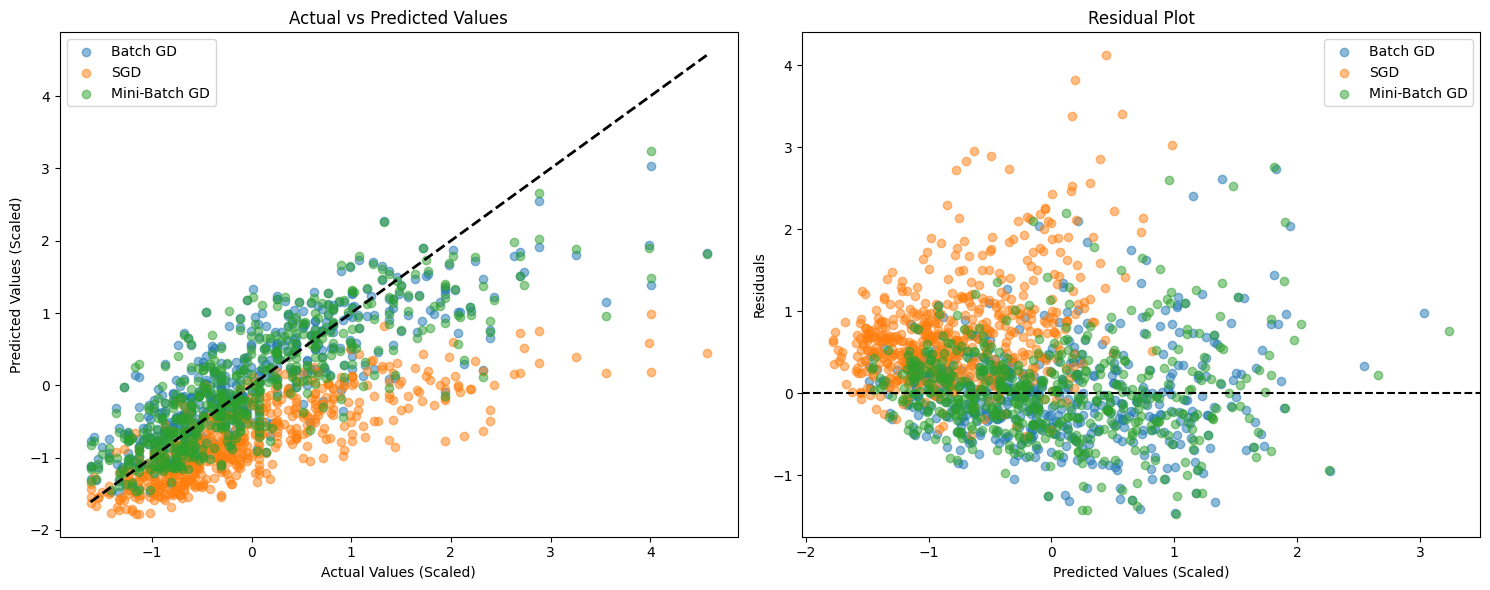

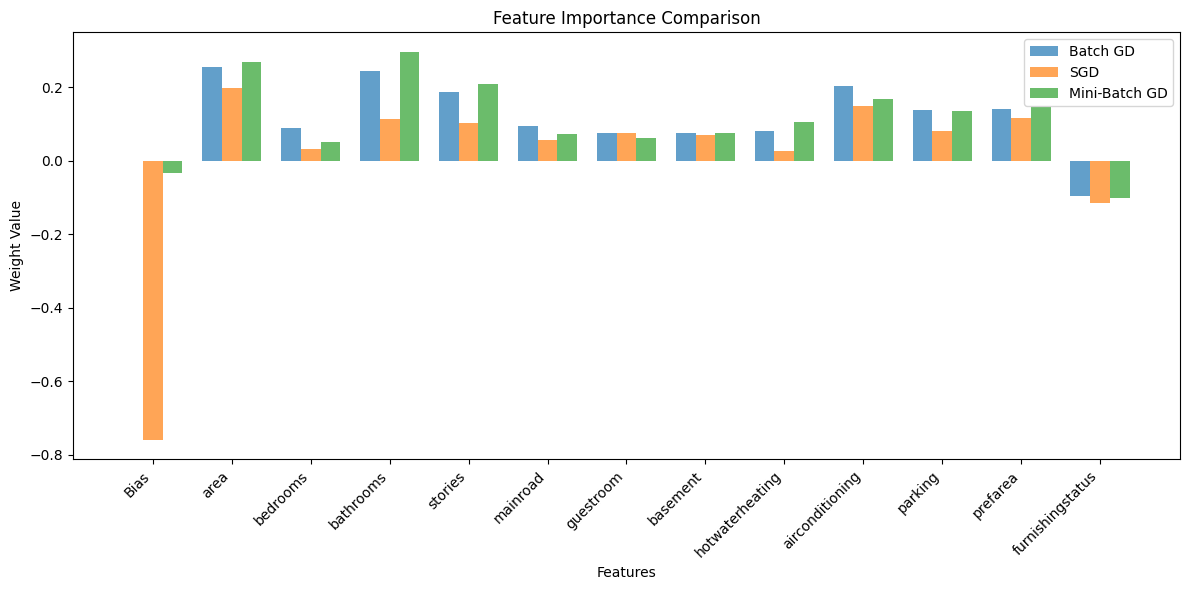

In [11]:
import matplotlib.pyplot as plt

# Get predictions from all models
predictions_batch = X_bias @ w_batch
predictions_sgd = X_bias @ w_sgd
predictions_mini = X_bias @ w_minibatch

# Create scatter plots
plt.figure(figsize=(15, 6))

# Actual vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_scaled, predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(y_scaled, predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(y_scaled, predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'k--', lw=2)
plt.xlabel('Actual Values (Scaled)')
plt.ylabel('Predicted Values (Scaled)')
plt.title('Actual vs Predicted Values')
plt.legend()

# Residual plots
plt.subplot(1, 2, 2)
plt.scatter(predictions_batch, y_scaled - predictions_batch, alpha=0.5, label='Batch GD')
plt.scatter(predictions_sgd, y_scaled - predictions_sgd, alpha=0.5, label='SGD')
plt.scatter(predictions_mini, y_scaled - predictions_mini, alpha=0.5, label='Mini-Batch GD')
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values (Scaled)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()

plt.tight_layout()
plt.show()

# Add a plot to show feature importance
plt.figure(figsize=(12, 6))
feature_names = ['Bias'] + feature_cols
x_pos = np.arange(len(feature_names))
width = 0.25

plt.bar(x_pos - width, w_batch, width, label='Batch GD', alpha=0.7)
plt.bar(x_pos, w_sgd, width, label='SGD', alpha=0.7)
plt.bar(x_pos + width, w_minibatch, width, label='Mini-Batch GD', alpha=0.7)

plt.xlabel('Features')
plt.ylabel('Weight Value')
plt.title('Feature Importance Comparison')
plt.xticks(x_pos, feature_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()